In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Shhhhhhh....
import warnings
warnings.filterwarnings('ignore')


1. Define a function named get_lower_and_upper_bounds that has two arguments. 
    - The first argument is a pandas Series. 
    - The second argument is the multiplier, which should have a default argument of 1.5.

In [83]:
def get_lower_and_upper_bounds(num, multiplier = 1.5):
    '''
    Takes in a panda Series, and a Multiplier (default: 1.5)
    Finds the four quartiles, Interquartile Range (Q3 - Q1), Lower bound with Q1 - (IQR * [multiplier]), and Upper bound with Q3 + (IQR * [multiplier])
    '''
    # Turkey Rules!
    # s_range = pd_series.max() - pd_series.min()
    # quartile = s_range * .25
    # q1 = pd_series.min() + quartile
    # q3 = pd_series.max() - quartile
    low = num[num < num.median()]
    q1 = low.median()
    high = num[num > num.median()]
    q3 = high.median()
    iqr = q3 - q1
    lower = q1 - (iqr * multiplier)
    upper = q3 + (iqr * multiplier)
    return lower, upper

In [84]:
num= pd.Series([1,2,3,4,5,6,6,7,8,12,15])

In [85]:
num[num > num.median()]

7      7
8      8
9     12
10    15
dtype: int64

In [86]:
# Double Checking!
q1 = 3
q3 = 10
iqr = 7
lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)
lower, upper
# Checked and it works for both odd and even. Def does too!

(-7.5, 20.5)

In [87]:
lower, upper = get_lower_and_upper_bounds(num)
lower, upper

(-7.5, 20.5)

##### Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
- Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

##### Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [88]:
df = pd.read_csv("lemonade.csv")

In [89]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [90]:
df['Date'] = pd.to_datetime(df.Date)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   Day          365 non-null    object        
 2   Temperature  365 non-null    float64       
 3   Rainfall     365 non-null    float64       
 4   Flyers       365 non-null    int64         
 5   Price        365 non-null    float64       
 6   Sales        365 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 20.1+ KB


In [92]:
df = df.set_index('Date')

In [93]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


Visualisation is Key
- Box Plots
    - See https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
    - This tutorial is a helpful guide: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
- Scatter Plots
- Plot a Histogram
    - Super Quick Pandas Method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<AxesSubplot:>

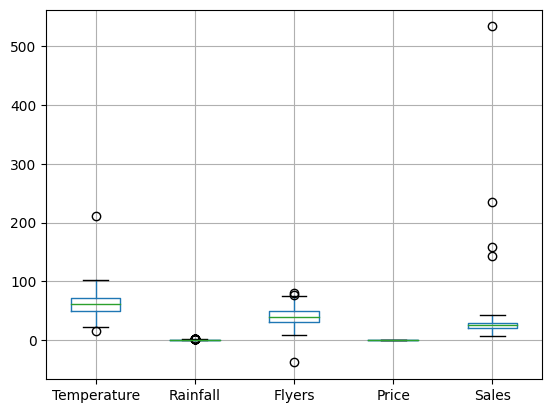

In [94]:
df.boxplot()

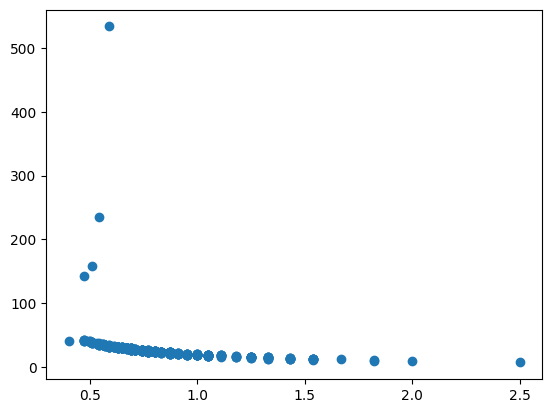

In [95]:
plt.scatter(data = df, x= "Rainfall", y = "Sales")

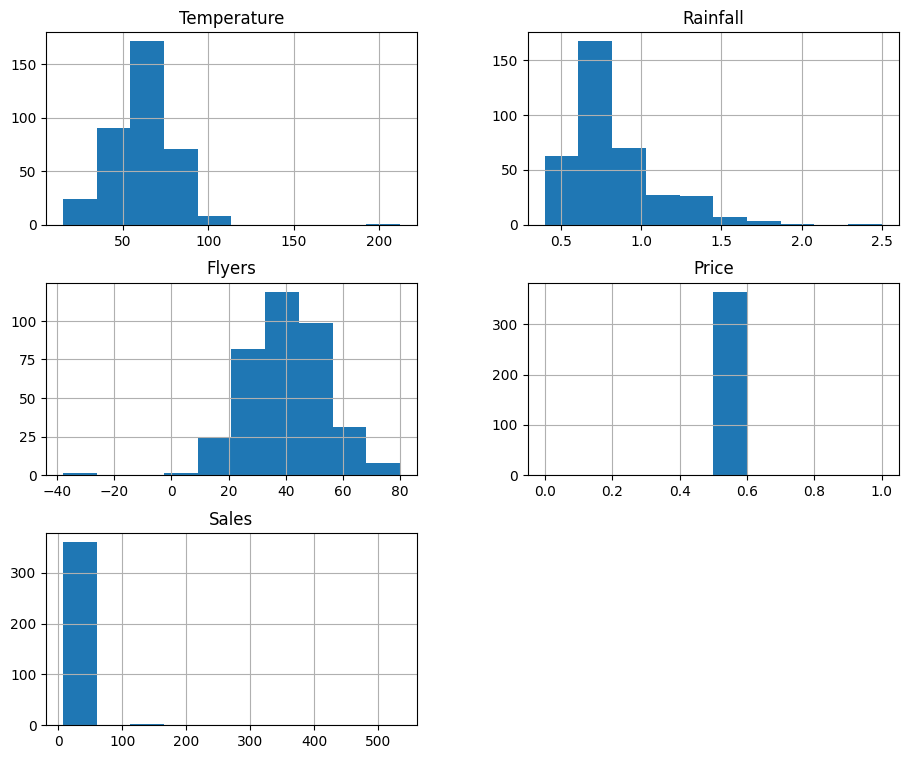

In [96]:
# Super Quick Pandas in Action!
df.hist(figsize= (11,9))
plt.show()

> We have a day where there are negative flyers, and unless they're counting like flyers ripped down or something that isn't possible. Also one of the temps is the boiling point of water in Fahrenheit, so unless that was the last day of sales, Ever, it's not possible either. Also there is one day with over 500 sales when the average sales is under 30.

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [97]:
df.columns

Index(['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

Price is always 50 cents, so it won't work for upper and lower.

In [98]:
columns = ["Temperature", "Rainfall", "Flyers", "Sales"]
for c in columns:
    c2 = df[c]
    lower, upper = get_lower_and_upper_bounds(c2)
    print(f"{c} : {lower}")

Temperature : 16.57500000000001
Rainfall : 0.20999999999999996
Flyers : 4.0
Sales : 2.5


In [109]:
df[df.Temperature <= 16.575]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-12-31,Sunday,15.1,2.5,9,0.5,7


In [110]:
df[df.Rainfall <= 0.21]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


In [111]:
df[df.Flyers < 4.0]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [112]:
df[df.Sales < 2.5] # How can you even have half a sale?

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,


-----
I like how the teachers make a dictionary (I have a hard time with understanding dictionaries on my own...)

In [114]:
# outliers will be a dictionary with a key associated with each column name
# within the value of each column name, 
# let's establish a sub dictionary.
# outliers['rainfall'] = {
# 'bounds': upper and lower,
# 'df': df[df.col > upper | df.col < lower]
# }

In [117]:
# at a multiplier of 1.5:
# initialize outliers as a dictionary
outliers = {}
# for every column in df.columns
for col in df.columns:
    #if the datatype of that column is of the numpy number family:
    if np.issubdtype(df[col].dtype, np.number):
        #use our function to get the lower and upper bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(
            df[col])
        print(f'''Lower bound for {col}: {lower_bound}
Upper bound for {col}: {upper_bound}.
''')
        # establish outliers[colname] as a new dictionary
        outliers[col] = {}
        #establish key-value pairs for bound values
        # and do the same as a subset of the dataframe that represents
        #where our outliers sit
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (
            df[col] < lower_bound)]
        

Lower bound for Temperature: 16.57500000000001
Upper bound for Temperature: 104.775.

Lower bound for Rainfall: 0.20999999999999996
Upper bound for Rainfall: 1.33.

Lower bound for Flyers: 4.0
Upper bound for Flyers: 76.0.

Lower bound for Price: nan
Upper bound for Price: nan.

Lower bound for Sales: 2.5
Upper bound for Sales: 46.5.



In [118]:
# Teachers used a .quantile() for their upper and lower def, let me see if that will allow Price to have numbers.
def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [119]:
# at a multiplier of 1.5:
# initialize outliers as a dictionary
outliers = {}
# for every column in df.columns
for col in df.columns:
    #if the datatype of that column is of the numpy number family:
    if np.issubdtype(df[col].dtype, np.number):
        #use our function to get the lower and upper bounds
        lower_bound, upper_bound = get_lower_and_upper_bounds(
            df[col])
        print(f'''Lower bound for {col}: {lower_bound}
Upper bound for {col}: {upper_bound}.
''')
        # establish outliers[colname] as a new dictionary
        outliers[col] = {}
        #establish key-value pairs for bound values
        # and do the same as a subset of the dataframe that represents
        #where our outliers sit
        outliers[col]['bounds'] = {'upper': upper_bound, 'lower': lower_bound}
        outliers[col]['df'] = df[(df[col] > upper_bound) | (
            df[col] < lower_bound)]
        

Lower bound for Temperature: 16.700000000000003
Upper bound for Temperature: 104.7.

Lower bound for Rainfall: 0.26
Upper bound for Rainfall: 1.3.

Lower bound for Flyers: 4.0
Upper bound for Flyers: 76.0.

Lower bound for Price: 0.5
Upper bound for Price: 0.5.

Lower bound for Sales: 5.0
Upper bound for Sales: 45.0.

